<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/6_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EC%B2%B4%EC%9D%B8%EA%B3%BC_%ED%8C%8C%EC%9D%B4%ED%94%84%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=bca92dc80d5ae1734f609fd0e0290dd611a7894ead27a8552c6c7b482b10c1ba
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(10,6)})

from pandas.core.common import random_state

In [3]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


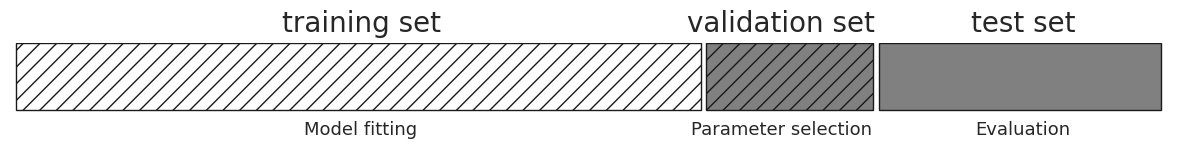

In [4]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
mglearn.plots.plot_threefold_split()

# 6 알고리즘 체인과 파이프 라인

입력 데이터의 표현 형태에 매우 민감한 머신러닝 알고리즘이 많다.
데이터의 스케일을 조정하고 특성을 연결하는 것 부터 비지도 학습으로 직접 특성을 만드는 것까지 한다. 따라서 대부분 머신러닝 앱은 하나의 알고리즘으로 이워져 있지 않고 여러 단계의 처리과정과 머신러닝 모델이 연결되어있다.
이번 장에선 데이터의 변환 과정과 머신러닝 모델을 쉽게 연결해주는  Pipeline 파이썬 클래스를 다루어 보겠다. 특히 Pipeline 과 GridSearchCV 를 함께 사용하여 각 처리 단계에서 필요한 매개 변수 탐색을 동시에 수행할 것이다.
\
모델 체인의 좋은 예로, cancer 데이터셋을 MinMaxScaler로 전처리를 해서 커널 SVM의 성능을 크게 향상시킨 것을 들 수 있다. 다음은 데이터를 분할 하고 최솟값, 최댓값을 찾아 데이터의 스케일으 바꾸고 SVM을 훈련시키는 코드이다.

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 적재와 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 훈련 데이터의 최솟값, 최댓값을 계산한다.
scaler = MinMaxScaler().fit(X_train)

# 훈련 데이터의 스케일을 조정한다. (0~1 사이값으로 변경)
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# 스케일 조정된 훈련데이터에 SVM을 학습시킨다.
svm.fit(X_train_scaled, y_train)
# 테스트 데이터의 스케일을 조정하고 점수를 계산한다.
X_test_scaled = scaler.transform(X_test)
print('테스트 점수: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.97


## 6.1 데이터 전처리와 매개변수 선택
5장에서 처럼 GridSearchCV 를 사용해 더 좋은 SVC 매개 변수를 찾으려한다. 어떻게 해야할까.

In [6]:
from sklearn.model_selection import GridSearchCV
# 이 코드는 예를 위한 것이다. 실제론 이렇게 사용하면 안된다.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid, cv=5)            
grid.fit(X_train_scaled, y_train)
print('최상의 교차 검증 정확도: {:.2f}'.format(grid.best_score_))
print('테스트 점수: {:.2f}'.format(grid.score(X_test_scaled, y_test)))
print('최적의 매개변수: ', grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


스케일을 조정한 데이터를 사용해서 SVC의 매개변수에 대해 그리드서치를 수행했다. 그러나 이 코드에는 교모한 함정이 있다. 데이터의 최솟값과 그 최댓값을 계산할 때 학습을 위해 훈련 세트에 있는 모든 데이터를 사용했다. 그런 다음 스케일이 조정된 훈련 데이터에서 교차 검증을 사용해 그리드 서치를 수행했다. 교차 검증의 각 분할에서 원본 훈련 세트 데이터의 어떤 부분은 훈련 폴드가 되고 어떤 부분은 검증 폴드가 된다. 검증 폴드는 훈련 폴드로 학습된 모델이 새로운 데이터에 적용할 때의 성능을 측정하는 데에 사용한다. 그러나 데이터 스케일을 조정할때 검증 폴드에 들어있는 정보까지 이미 사용한다. 즉 데이터의 스케일을 조정하기 위해 검증폴더의 데이터 까지 이용했고 이는 새로운 데이터가 모델에 나타날때와는 완전히 다르다. 새로운 데이터가 관측되면, 이 데이터는 훈련 데이터의 스케일을 조정에 사용되지 않는 것이라, 최댓 최솟 훈련 데이터와 다를 수 있다.

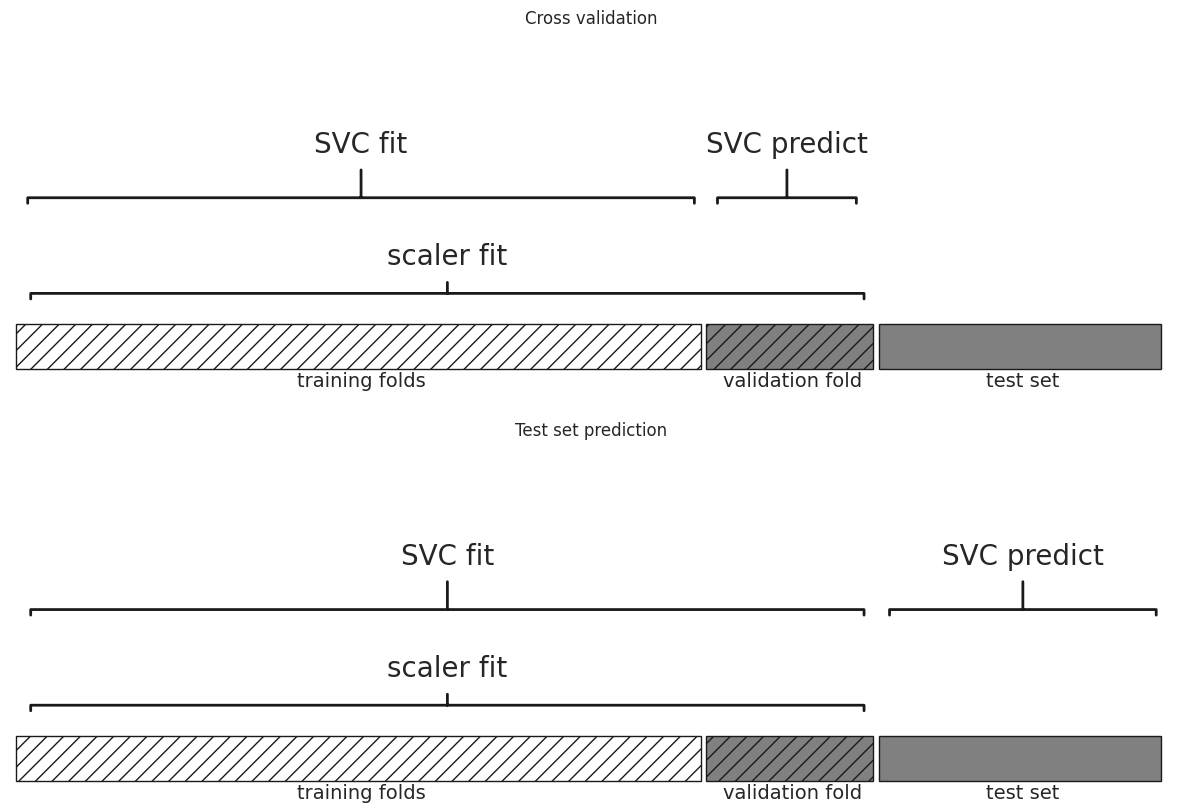

In [7]:
# 6.1 교차검증 동안 데이터 처리와 최종 평가가 어떻게 다른지 시각화
mglearn.plots.plot_improper_processing()
# 교차 검증 반복 밖에서 전처리가 될 때 데이터 사용 형태

이 문제를 해결하기 위해서 교차 검증의 분할이 모든 전처리 과정보다 앞서 이뤄져야 한다. sklearn 에서 cross_val_socre 함수와 GridSearchCV 로 이런 방식을 구현하려면 Pipeline을 사용한다. Pipeline 은 fit, predict, score 메서드를 제고하고 scikit-learn 의 다른 모델들과 유사하게 작동한다.

## 6.2 파이프라인 구축하기
SVM을 훈련시키는 워크플로를 pipeline을 사용해서 어떻게 표현하는 지 알아보자

In [8]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [9]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [10]:
print('테스트 점수: {:.2f}'.format(pipe.score(X_test, y_test)))

테스트 점수: 0.97


## 6.3 그리드 서치에 파이프라인 적용하기
파이프라인 인용 매개변수 그리드는 단계 이름과 매개변수 이름을 '__'로 연결해 만듭니다. 그래서  SVC의 매개변수 C를 그리드 서치로 탐색하려면 매개변수 그리드 딕셔너리의 키를 svm__C 로 해야하고 gamma 에 대해서도 동일합니다

In [11]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)        
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [12]:
print('최상에 교차 검증 정확도: {:.2f}'.format(grid.best_score_))
print('테스트 셋 점수 : {:.2f}'.format(grid.score(X_test, y_test)))
print('최적의 매개변수:',grid.best_params_)

최상에 교차 검증 정확도: 0.98
테스트 셋 점수 : 0.97
최적의 매개변수: {'svm__C': 1, 'svm__gamma': 1}


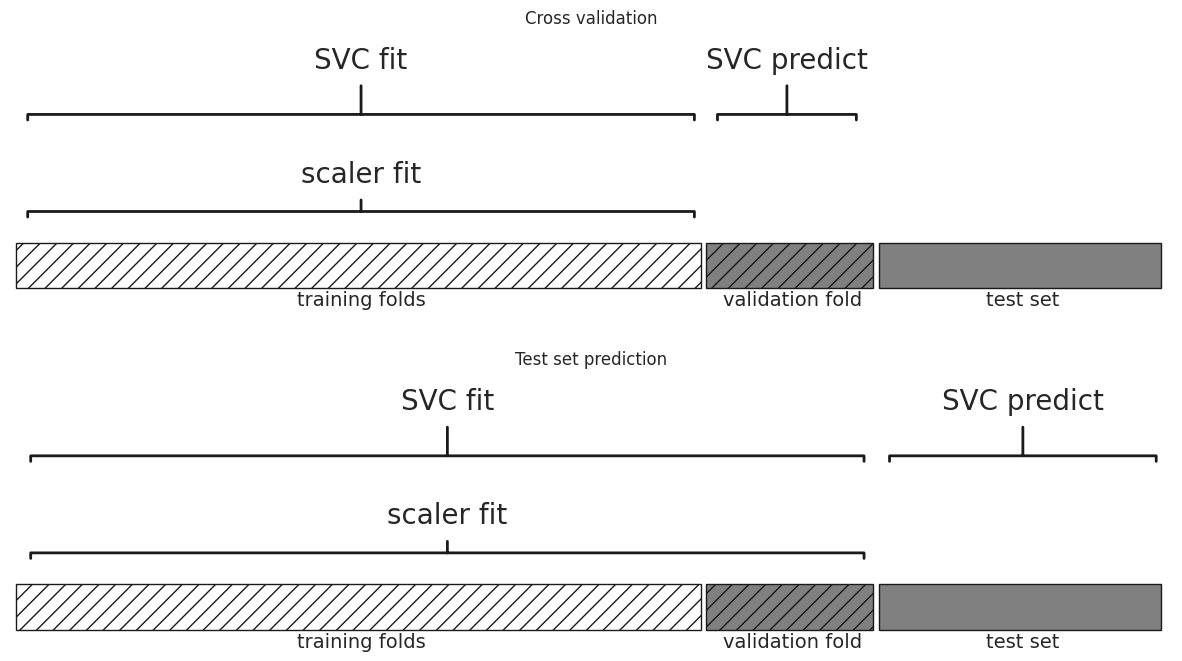

In [13]:
mglearn.plots.plot_proper_processing()

스케일 fit 에서 검증 폴드를 누설 시키지 않아서, test_set을 확인하기 적합해졌다.

### 정보 누설에 대한 예시

헤이스티, 팁시라니, 프리드먼의 책에 교차 검증의 정보 누설에 대한 좋은 예가 있다. 이 예를 약간 수정하여 재현해보자. 정규분포로 부터 추출한 10,000개의 특성을 가진 샘플 100개를 사용한 회귀 문제를 생각해 보겠다. 출력값도 정규분호로 부터 샘플링한다.

In [14]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

데이터 X와 타깃 y 사이에 아무런 관계가 없다. 그러므로 이 데이터셋으로 무선가를 학습하기에는 불가능하다. 따라서 다음과 같이 해보겠다.
SelectPercentile로 10,000개 중 가장 유용한 특성을 선택하고 교차 검증을 사용하여 Ridgeㅎ회귀를 평가해보겠다.

In [15]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X,y)
X_selected = select.transform(X)
print('X_select.shape:', X_selected.shape)

X_select.shape: (100, 500)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print('교차 검증 점수(리지): {:.2f}'.format(np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

교차 검증 점수(리지): 0.91


교자 검증으로 계산한 평균 R^2는 0.91로 매우 좋은 모델이다. 근데 데이터셋을 무작위로 만들었으니 있을 수 없는 일이다. 교차 검증 밖에서 특성을 선택했기 때문에 훈련과 테스트  폴드 양쪽에 연관된 특성이 찾아질 수 있다. 테스트 폴드에서 유출된 정보가 매우 중요한 역할 을 했기 때문이다. 이제 파이프라인을 사용해서 교차검증을 해보겠다

In [17]:
pipe = Pipeline([('select', SelectPercentile(score_func=f_regression, percentile=5)),
                 ('ridge', Ridge())])
print('교차 검증 점수(파이프라인): {:.2f}'.format(np.mean(cross_val_score(pipe, X, y, cv=5))))

교차 검증 점수(파이프라인): -0.25


이번엔 점수가 음수라는 성능이 매우 낮은 모델임을 나타낸다. 파이프라인을 사용했기에 특성 선택이 교차 검증 반복 안으로 들어갔다. 이 말은 훈련 폴드를 사용해서만 특성이 선택되었고 테스트 폴드는 사용하지 않았다는 뜻이다. 특성 선택 단계에서 훈련 폴들의 타깃 값과 연관된 특성을 찾았지만, 전체 데이터가 무작위로 만들어졌으니 테스트 폴드의 타깃과는 연관성이 없다. 이 예는 특성 선택 단계에서 일어나는 정부 누설을 막는 것이 모델의 성능을 평가하는 데 큰 차이를 만든다는 것을 보여준다.


\
## 6.4 파이프라인 인터페이스
Pipeline은 전처리나 분류에 국한하지 않고 어떤 추정기와도 연결할 수 있다. 특성 추출, 특성 선택, 스케일 변경, 분류의 총 네 단계를 포함하는 파이프 라인을 만들수 있다. 또한 분류 대신 회귀나 군집이 될 수도 있다

In [18]:
def fit(self, X, y):
  X_transformed = X
  for name, estimator in self.steps[:-1]:
    # 마지막 단계를 빼고 fit과 transform을 반복한다.
    X_transformed = estimator.fit_transform(X_transformed, y)
  # 마지막 단계 fit을 호출한다.
  self.steps[-1][1].fit(X_transformed, y)
  return self


In [19]:
def predict(self, X):
  X_transformed = X
  for step in steps[:-1]:
    # 마지막 단계를 빼고 fit과 transform을 반복한다.
    X_transformed = step[1].transform(X_transformed)
  # 마지막 단계 predict 을 호출한다.
  return self.steps[-1][1].predict(X_transformed)


In [20]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('select',
                 SelectPercentile(percentile=5,
                                  score_func=<function f_regression at 0x7f05bf704320>)),
                ('ridge', Ridge())])

6.4.1 make_pipeline을 사용한 파이프라인 생성

In [22]:
from sklearn.pipeline import make_pipeline
# 표준적인 방법
pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])
# 간소화된 방법
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [23]:
print('파이프라인 단계:\n', pipe_short.steps)

파이프라인 단계:
 [('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]
